In [16]:
# Importing libraries

import numpy as np
import pandas as pd
import urllib.request

import matplotlib.pyplot as plt # plotting library
import seaborn as sns

import robustocs as rocs
from robustocs import utils
from robustocs import pedigree


In [3]:
# Importing data

# load in the problem variables
sigma, mubar, omega, n, _, _, _ = rocs.load_problem(
    sigma_filename="../data/A50.txt",
    mu_filename="../data/EBV50.txt",
    omega_filename="../data/S50.txt",
    issparse=True
)

file_path = "../data/SEX50.txt"

# Load the file while treating it as a text-based dataset
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

kin = sigma/2

/var/folders/yh/0bk27b457hb862b_2wsrctcr0000gr/T/ipykernel_42836/3244010030.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


There are different selection methods, 

# Truncation selection

Truncation selection is known to be the most efficient form of directional selection (Kimura, xxx). With this metodology the best individuals from a population are selected for reproduction. However, in this was usually maximized genetic gain with no or an implicit limitations of rates of inbreeding.  

For truncation selection, individuals are ranked based on the EBV, then only the best are choosen as parent for the next generation. 

![Example Image](../images/truncation.png)


## Description

In the truncation scenario, lambda (the penalty on group coancestry) and kappa (the parameter controlling group uncertainty) were both set to 0. Only the contributions for males were optimized, while the contributions for females remained fixed at 0.02.

In [4]:
# Parameters

sires = range(0, n, 2)
dams = range(1, n, 2)

# Max contributions definition

# upper
upper = np.zeros(n)
upper[::2] = 0.5  
upper[1::2] = 0.02 

# lower
lower = np.zeros(n)
lower[::2] = 0.0  
lower[1::2] = 0.02  


lam = 0
kap = 0

In [5]:
# Model

w_truncation, z_truncation, obj_truncation = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, upper_bound=upper, lower_bound=lower)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Hessian has dimension 50 but no nonzeros, so is ignored


In [7]:
# Statistics truncation

# Expected genetic gain
genetic_gain_sel_truncation = utils.expected_genetic_merit(w_truncation, mubar)

# Expected group coancestry
group_coancestry_sel_truncation = utils.group_coancestry(w_truncation,sigma)

# Expected grouo uncertainty
group_uncertainty_truncation = z_truncation


print("Expected genetic gain:", genetic_gain_sel_truncation)
print("Expected group coancestry:", group_coancestry_sel_truncation)
print("Expected group uncertainty:", group_uncertainty_truncation)

Expected genetic gain: 2.043087959504886
Expected group coancestry: 0.3153644973754871
Expected group uncertainty: 0.25044569048135296


# Conservation
A strict conservation scenario occurs when a high penalty is applied to group coancestry (lambda). In this exercise, we empirically determined the lambda value by increasing it until genetic gain reached a minimum and stabilized (lambda = 1001).  and kappa was set to 0.



In [8]:
# Parameters

sires = range(0, n, 2)
dams = range(1, n, 2)

# Max contributions definition

# upper
upper = np.zeros(n)
upper[::2] = 0.5  
upper[1::2] = 0.02 

# lower
lower = np.zeros(n)
lower[::2] = 0.0  
lower[1::2] = 0.02  


lam = 1001
kap = 0

In [9]:
# Model

w_conservation, z_conservation, obj_conservation = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, upper_bound=upper, lower_bound=lower)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms


In [10]:
# Statistics conservation

# Expected genetic gain
genetic_gain_sel_conservation = utils.expected_genetic_merit(w_conservation, mubar)

# Expected group coancestry
group_coancestry_sel_conservation = utils.group_coancestry(w_conservation,sigma)

# Expected grouo uncertainty
group_uncertainty_conservation = z_conservation


print("Expected genetic gain:", genetic_gain_sel_conservation)
print("Expected group coancestry:", group_coancestry_sel_conservation)
print("Expected group uncertainty:", group_uncertainty_conservation)

Expected genetic gain: 1.8379354183142913
Expected group coancestry: 0.08680096427530473
Expected group uncertainty: 0.09425649413337275


# Uncertainty

For this scenario, the value of kappa was adjusted until genetic gain reached a minimum and remained constant, while lambda was set to 0. 

In [11]:
# Parameters

sires = range(0, n, 2)
dams = range(1, n, 2)

# Max contributions definition

# upper
upper = np.zeros(n)
upper[::2] = 0.5  
upper[1::2] = 0.02 

# lower
lower = np.zeros(n)
lower[::2] = 0.0  
lower[1::2] = 0.02  


lam = 0
kap = 100

In [12]:
# Model

w_uncertainty, z_uncertainty, obj_uncertainty = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, upper_bound=upper, lower_bound=lower)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Hessian has dimension 50 but no nonzeros, so is ignored


In [13]:
# Statistics uncertainty

# Expected genetic gain
genetic_gain_sel_uncertainty = utils.expected_genetic_merit(w_uncertainty, mubar)

# Expected group coancestry
group_coancestry_sel_uncertainty = utils.group_coancestry(w_uncertainty,sigma)

# Expected grouo uncertainty
group_uncertainty_uncertainty = z_uncertainty


print("Expected genetic gain:", genetic_gain_sel_uncertainty)
print("Expected group coancestry:", group_coancestry_sel_uncertainty)
print("Expected group uncertainty:", group_uncertainty_uncertainty)

Expected genetic gain: 1.8635800512880005
Expected group coancestry: 0.08877838890695486
Expected group uncertainty: 0.09214842458824989


In [29]:

# Sample DataFrame
results = pd.DataFrame({
    " ": ["Expected genetic gain", "Expected group coancestry", "group uncertainty"],
    "Truncation": [2.043, 0.315, 0.250],
    "Conservation": [1.838, 0.087, 0.094],
    "Uncertainty": [1.864, 0.098, 0.092], 
})

# Convert DataFrame to Markdown Table
print(results.to_markdown(index=False))  # Requires 'tabulate' package

|                           |   Truncation |   Conservation |   Uncertainty |
|:--------------------------|-------------:|---------------:|--------------:|
| Expected genetic gain     |        2.043 |          1.838 |         1.864 |
| Expected group coancestry |        0.315 |          0.087 |         0.098 |
| group uncertainty         |        0.25  |          0.094 |         0.092 |


As expected, the results indicate that in the absence of penalization on group coancestry and group uncertainty, the expected genetic gain, expected group coancestry, and group uncertainty are at their highest. Additionally, expected genetic gain and expected coancestry are slightly higher in the uncertainty scenario compared to the conservation scenario.

In [25]:
df['w_truncation'] = w_truncation
df['w_conservation'] = w_conservation
df['w_uncertainty'] = w_uncertainty
df['ebv'] = mubar

# Rename all columns
df.columns = ["idd", "sex", "w_truncation", "w_conservation", "w_uncertainty", "ebv"]

print(df.head())

     idd sex  w_truncation  w_conservation  w_uncertainty       ebv
0  11951   M          0.00        0.018201       0.017095  1.780709
1  11952   F          0.02        0.020000       0.020000  2.057584
2  11953   M         -0.00        0.012828       0.026790  2.228707
3  11954   F          0.02        0.020000       0.020000  1.732222
4  11955   M          0.00        0.018671       0.015184  1.494452


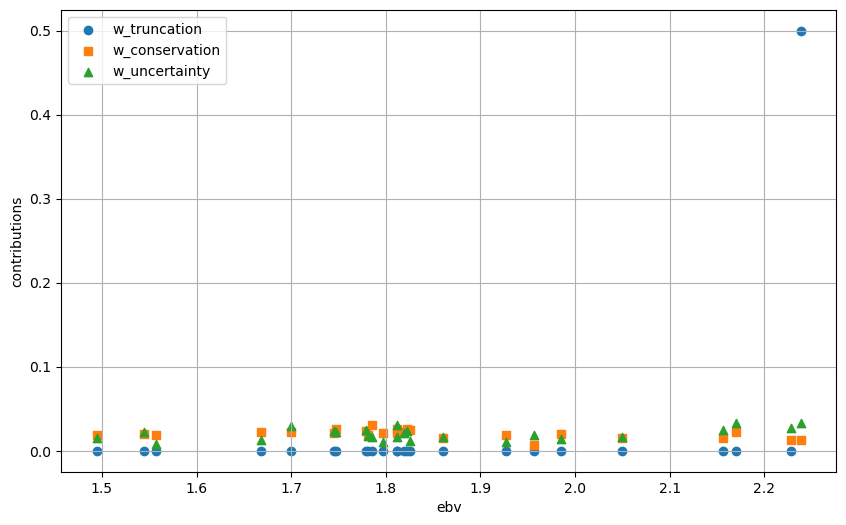

In [27]:

plt.figure(figsize=(10, 6))

df_male = df[df["sex"] == "M"]

plt.scatter(df_male["ebv"], df_male["w_truncation"], label="w_truncation", marker="o")
plt.scatter(df_male["ebv"], df_male["w_conservation"], label="w_conservation", marker="s")
plt.scatter(df_male["ebv"], df_male["w_uncertainty"], label="w_uncertainty", marker="^")

plt.xlabel("ebv")
plt.ylabel("contributions")
plt.legend()
plt.grid(True)
plt.show()

The animal with the highest EBV was selected as parents for the next generation. The contributions for the 25 males in scenario conservation and uncertainty are >0.01 and all males were selected as parents for future generation. 